# Hard-thresholding filtering

In [10]:
import numpy as np
from numpy import pi as pi
import scipy.signal as sg 
import seaborn as sns
import matplotlib.pyplot as plt
import cmocean
from benchmark_demo.utilstf import *
from benchmark_demo.SignalBank import SignalBank
# from methods.method_delaunay_triangulation import instantiate_method
from methods.method_hard_threshold import hard_thresholding

In [11]:
# A test for new methods
np.random.seed(0) 

# signal parameters
SNRin = 0
N = 2**10
sbank = SignalBank(N=N,)
# s = sbank.signal_cos_chirp()
# s = sbank.signal_mc_multi_linear()
# s = sbank.signal_mc_cos_plus_tone()

# s = sbank.signal_mc_modulated_tones()
# s = sbank.signal_mc_synthetic_mixture()
s = sbank.signal_mc_synthetic_mixture_4()
# s = sbank.signal_mc_impulses()
signal, noise = add_snr(s,SNRin)

snr_out:0.0


C:\Users\juan_\Nextcloud\Miramont_Juan\python_code\benchmark-denoising\src\benchmark_demo\SignalBank.py:1245: RuntimeWarning: divide by zero encountered in divide
  e = np.exp(-alfa*np.arange(tt))*((np.arange(tt)-c)**2/np.arange(tt))


In [12]:

Nfft = N
g,_ = get_round_window(Nfft)
S, stft = get_spectrogram(signal, window = g)
output_dict = hard_thresholding(signal, coeff=3.0, dict_output=True)
signals_output, mask, stft = (i for i in output_dict.values())
print(10*np.log10((np.sum(s**2))/(np.sum((s-signals_output)**2))))

C:\Users\juan_\Nextcloud\Miramont_Juan\python_code\benchmark-denoising\src\benchmark_demo\utilstf.py:95: ComplexWarning: Casting complex values to real discards the imaginary part
  x[icol]=x[icol]+tfr[indices,tj]*window[Lh+tau]


1.9014811585282307


(1025, 1024)


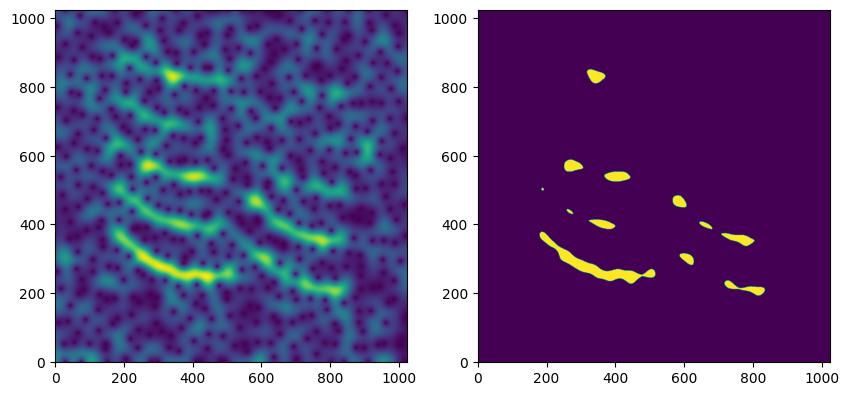

In [13]:
print(S.shape)
fig, ax = plt.subplots(1,2,figsize = (10,5))
ax[0].imshow(abs(stft[0:N+1,:]), origin='lower')#, cmap=cmocean.cm.deep)
ax[1].imshow(mask, origin='lower')
# ax[1].plot(signals_output)
# ax[1].plot(s,'r--')
plt.show()
